In [1]:
# Analise do CSV(sia112018), atendimentos de consultas dos dados aberto do Distrito Federal(saúde)

In [54]:
# Importando as bibliotecas
import pandas as pd
import json
%matplotlib inline

In [93]:
# Carregando os dados no formato json e transformando em CSV
df = pd.read_csv('Dados/sia112018.csv', sep = ';', encoding = 'cp1252')

In [96]:
# Alterando os nomes das colunas do DataFrame
df.columns = ['ano','cod_est','est','comp','cod_grup','grup','cod_grup_sub','sub_grup','cod_proc','proc','quant','cod_atend',
             'atend','cod_org']

In [98]:
df.head(3)

,ano,cod_est,est,comp,cod_grup,grup,cod_grup_sub,sub_grup,cod_proc,proc,quant,cod_atend,atend,cod_org
0,201811,2816741,FARMACIA DE ALTO CUSTO - ASA SUL,Alta complexidade,6,06 - Medicamentos,604,Sub Grupo: 04 - Componente Especializado da As...,604320132,"Fingolimode 0,5 Mg (por Cápsula)",28,1,Eletivo,60432
1,201811,2816741,FARMACIA DE ALTO CUSTO - ASA SUL,Alta complexidade,6,06 - Medicamentos,604,Sub Grupo: 04 - Componente Especializado da As...,604270038,Ciprofibrato 100 Mg (por Comprimido),30,1,Eletivo,60427
2,201811,2816741,FARMACIA DE ALTO CUSTO - ASA SUL,Alta complexidade,6,06 - Medicamentos,604,Sub Grupo: 04 - Componente Especializado da As...,604270038,Ciprofibrato 100 Mg (por Comprimido),30,1,Eletivo,60427


In [100]:
# Descreve as colunas numericas
df.describe()

,ano,cod_est,cod_grup,cod_grup_sub,cod_proc,quant,cod_atend,cod_org
count,180282.0,1.802820e+05,180282.000000,180282.000000,1.802820e+05,180282.000000,180282.000000,180282.000000
mean,201811.0,2.711795e+06,3.355121,338.785325,3.388762e+08,17.953717,22.030918,33887.610921
std,0.0,3.261024e+06,1.631517,163.201566,1.633118e+08,224.910496,40.205553,16331.187437
min,201811.0,1.045600e+04,1.000000,101.000000,1.010100e+08,0.000000,1.000000,10101.000000
25%,201811.0,1.049900e+04,2.000000,203.000000,2.030200e+08,1.000000,1.000000,20302.000000
50%,201811.0,1.137100e+04,3.000000,301.000000,3.010101e+08,1.000000,1.000000,30101.000000
75%,201811.0,5.717515e+06,5.000000,501.000000,5.010100e+08,4.000000,1.000000,50101.000000
max,201811.0,9.620338e+06,8.000000,803.000000,8.030101e+08,70861.000000,99.000000,80301.000000


In [103]:
# Lista de estabelecimento nos dados
df['est'].unique()

array(['FARMACIA DE ALTO CUSTO - ASA SUL',
       'IDR SAMAMBAIA SERVICOS MEDICOS', 'CEAL LP', 'SOCLIMED',
       'INSTITUTO HOSPITAL DE BASE DO DISTRITO FEDERAL', 'HRAN', 'CBV',
       'HRS', 'HOSPITAL REGIONAL DE CEILANDIA', 'HRG', 'HRL', 'NEPHRON',
       'INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       'SEANE SERVICO DE ASSISTENCIA CLIN',
       'HRT HOSPITAL REGIONAL DE TAGUATINGA',
       'FARMACIA DE ALTO CUSTO - CEILANDIA',
       'HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR-HCB',
       'HOSPITAL UNIVERSITARIO DE BRASILIA',
       'BANCO DE OLHOS DO DISTRITO FEDERAL', 'RENAL CARE',
       'FARMACIA DE ALTO CUSTO GAMA', 'POLICLINICA RIACHO FUNDO I',
       'POLICLINICA 03 DO LAGO SUL',
       'POLICLINA DA REGIAO OESTE UNIDADE BRAZLANDIA',
       'POLICLINICA 514 SUL - GSAS2 DIRASE/SRSCE',
       'LABORATORIO CENTRAL DA REGIAO DE SAUDE SUDOESTE',
       'POLICLINICA DE SOBRADINHO', 'CEDOH ASA NORTE',
       'POLICLINICA DA ATENCAO SECUNDARIA DE SAO SEBASTIAO',
       'PO

In [107]:
# Quantos procedimentos foram realizados em estabelecimentos
df['est'].value_counts().head(10)

HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB      18929
FARMACIA DE ALTO CUSTO - CEILANDIA                15693
INSTITUTO HOSPITAL DE BASE DO DISTRITO FEDERAL    15191
FARMACIA DE ALTO CUSTO - ASA SUL                  13876
HRT HOSPITAL REGIONAL DE TAGUATINGA               11156
HOSPITAL UNIVERSITARIO DE BRASILIA                11050
HOSPITAL REGIONAL DE CEILANDIA                     9754
FARMACIA DE ALTO CUSTO GAMA                        8829
HRAN                                               6265
HRG                                                5496
Name: est, dtype: int64

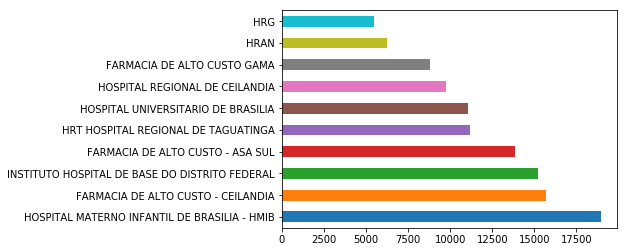

In [126]:
# Mostando os procedimentos atraves de um grafico
df['est'].value_counts().head(10).plot.barh()

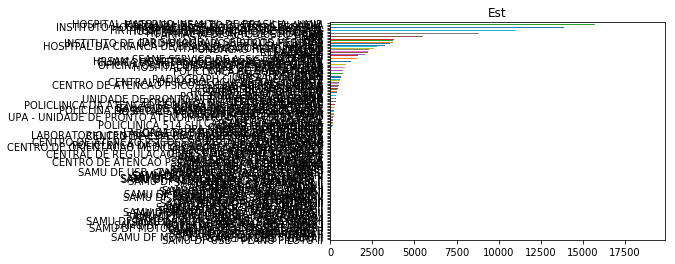

In [136]:
# Melhorando grafico de barras horizontal, invertindo a ordem e colocando titulo
df['est'].value_counts(ascending=True).plot.barh(title='Est')

In [111]:
# Criando um subconjunto dos dados originais
df_hostbase = df[df['est'] == 'HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB']

In [113]:
# Carregando as primeiras linhas do arquivo df_hostbase
df_hostbase.head(2)

,ano,cod_est,est,comp,cod_grup,grup,cod_grup_sub,sub_grup,cod_proc,proc,quant,cod_atend,atend,cod_org
11280,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,202,Sub Grupo: 02 - Diagnóstico em laboratório clí...,202010392,Dosagem de Ferro Sérico,300,99,BPA-C,20201
11294,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,202,Sub Grupo: 02 - Diagnóstico em laboratório clí...,202010465,Dosagem de Gama-glutamil-transferase (gama Gt),577,99,BPA-C,20201


In [115]:
# Verificando as ultimas 2 linhas do DataFrame df_hostbase
df_hostbase.tail(2)

,ano,cod_est,est,comp,cod_grup,grup,cod_grup_sub,sub_grup,cod_proc,proc,quant,cod_atend,atend,cod_org
180280,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,203,Sub Grupo: 03 - Diagnóstico por anatomia patol...,203010086,Exame Citopatológico Cervico Vaginal/microflor...,1,1,Eletivo,20301
180281,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,203,Sub Grupo: 03 - Diagnóstico por anatomia patol...,203010086,Exame Citopatológico Cervico Vaginal/microflor...,1,1,Eletivo,20301


In [119]:
# Listar linhas aleatórias do DataFrame
df_hostbase.sample(5)

,ano,cod_est,est,comp,cod_grup,grup,cod_grup_sub,sub_grup,cod_proc,proc,quant,cod_atend,atend,cod_org
139648,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,203,Sub Grupo: 03 - Diagnóstico por anatomia patol...,203010086,Exame Citopatológico Cervico Vaginal/microflor...,1,1,Eletivo,20301
173523,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,203,Sub Grupo: 03 - Diagnóstico por anatomia patol...,203010086,Exame Citopatológico Cervico Vaginal/microflor...,1,1,Eletivo,20301
175047,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,203,Sub Grupo: 03 - Diagnóstico por anatomia patol...,203010086,Exame Citopatológico Cervico Vaginal/microflor...,1,1,Eletivo,20301
118333,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,203,Sub Grupo: 03 - Diagnóstico por anatomia patol...,203010019,Exame Citopatologico Cervico-vaginal/microflora,1,1,Eletivo,20301
115217,201811,10537,HOSPITAL MATERNO INFANTIL DE BRASILIA - HMIB,Média complexidade,2,02 - Procedimentos com Finalidade Diagnóstica,203,Sub Grupo: 03 - Diagnóstico por anatomia patol...,203010043,Exame Citopatologico de Mama,1,1,Eletivo,20301


In [121]:
# Quantidade de procedimentos no hospital de base
df_hostbase['proc'].value_counts()

Exame Citopatológico Cervico Vaginal/microflora-rastreamento                                            12327
Exame Citopatologico Cervico-vaginal/microflora                                                          3415
Consulta Medica em Atenção Especializada                                                                  593
Mamografia Bilateral para Rastreamento                                                                    480
Exame Anatomo-patológico para Congelamento / Parafina por Peça Cirúrgica ou por Biopsia (exceto Colo      192
Exame de Citologia (exceto Cervico-vaginal)                                                               179
Ultra-sonografia Obstetrica                                                                               153
Exame Citopatologico de Mama                                                                              143
Ultrassonografia de Abdomen Total                                                                         138
Consulta d

In [125]:
# Podemos subdividir o DataFrame com base em pedaços de palavras
df_hostbase[df_hostbase['proc'].str.contains('Citopa')].count()

ano             15886
cod_est         15886
est             15886
comp            15886
cod_grup        15886
grup            15886
cod_grup_sub    15886
sub_grup        15886
cod_proc        15886
proc            15886
quant           15886
cod_atend       15886
atend           15886
cod_org         15886
dtype: int64